In [27]:
import numpy as np
np.random.seed(13)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [28]:
input_unit_size = 28*28
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)    
    plt.imshow(data.reshape(size, size))
    plt.gray()

In [31]:
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_train /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

X_train shape: (60000, 784)
60000 train samples


In [33]:
inputs = Input(shape=(input_unit_size,))
x = Dense(144, activation='relu')(inputs)
outputs = Dense(input_unit_size)(x)
model = Model(input=inputs, output=outputs)
model.compile(loss='mse', optimizer='adadelta')

In [34]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 144)           113040      input_3[0][0]                    
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 784)           113680      dense_3[0][0]                    
Total params: 226720
____________________________________________________________________________________________________


In [35]:
model.fit(X_train, X_train, nb_epoch=30, batch_size=258)

Epoch 1/30
60000/60000 [==============================] - 0s - loss: 0.0739     
Epoch 2/30
60000/60000 [==============================] - 0s - loss: 0.0554     
Epoch 3/30
60000/60000 [==============================] - 0s - loss: 0.0459     
Epoch 4/30
60000/60000 [==============================] - 0s - loss: 0.0400     
Epoch 5/30
60000/60000 [==============================] - 0s - loss: 0.0361     
Epoch 6/30
60000/60000 [==============================] - 0s - loss: 0.0331     
Epoch 7/30
60000/60000 [==============================] - 0s - loss: 0.0306     
Epoch 8/30
60000/60000 [==============================] - 0s - loss: 0.0285     
Epoch 9/30
60000/60000 [==============================] - 0s - loss: 0.0268     
Epoch 10/30
60000/60000 [==============================] - 0s - loss: 0.0253     
Epoch 11/30
60000/60000 [==============================] - 0s - loss: 0.0240     
Epoch 12/30
60000/60000 [==============================] - 0s - loss: 0.0230     
Epoch 13/30
60000/60000 [

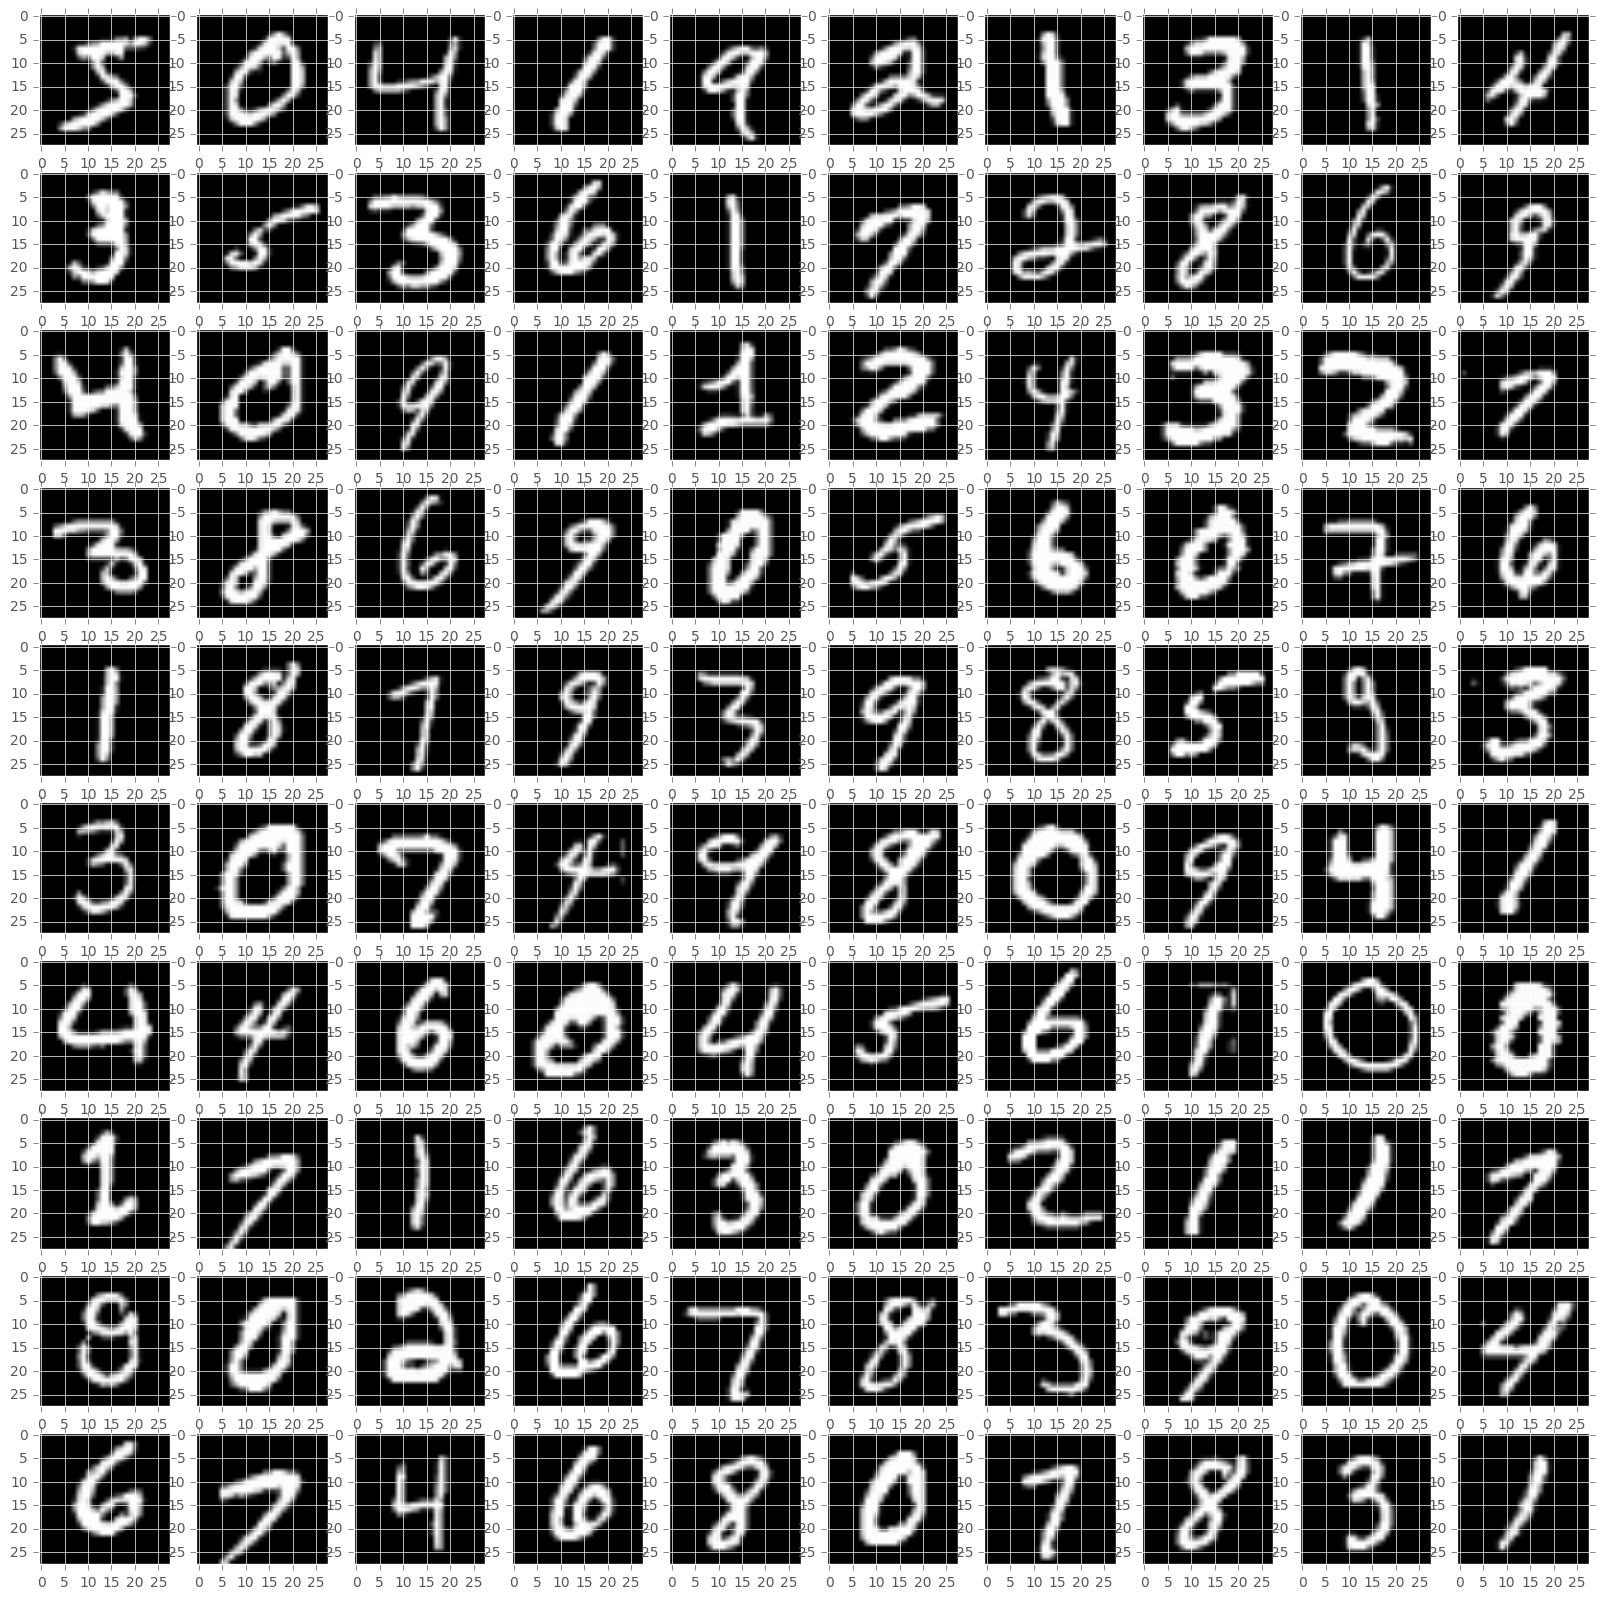

In [36]:
show_size = 10
total = 0
plt.figure(figsize=(20,20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(X_train[total], show_size, show_size, total+1)
        total+=1
plt.show()

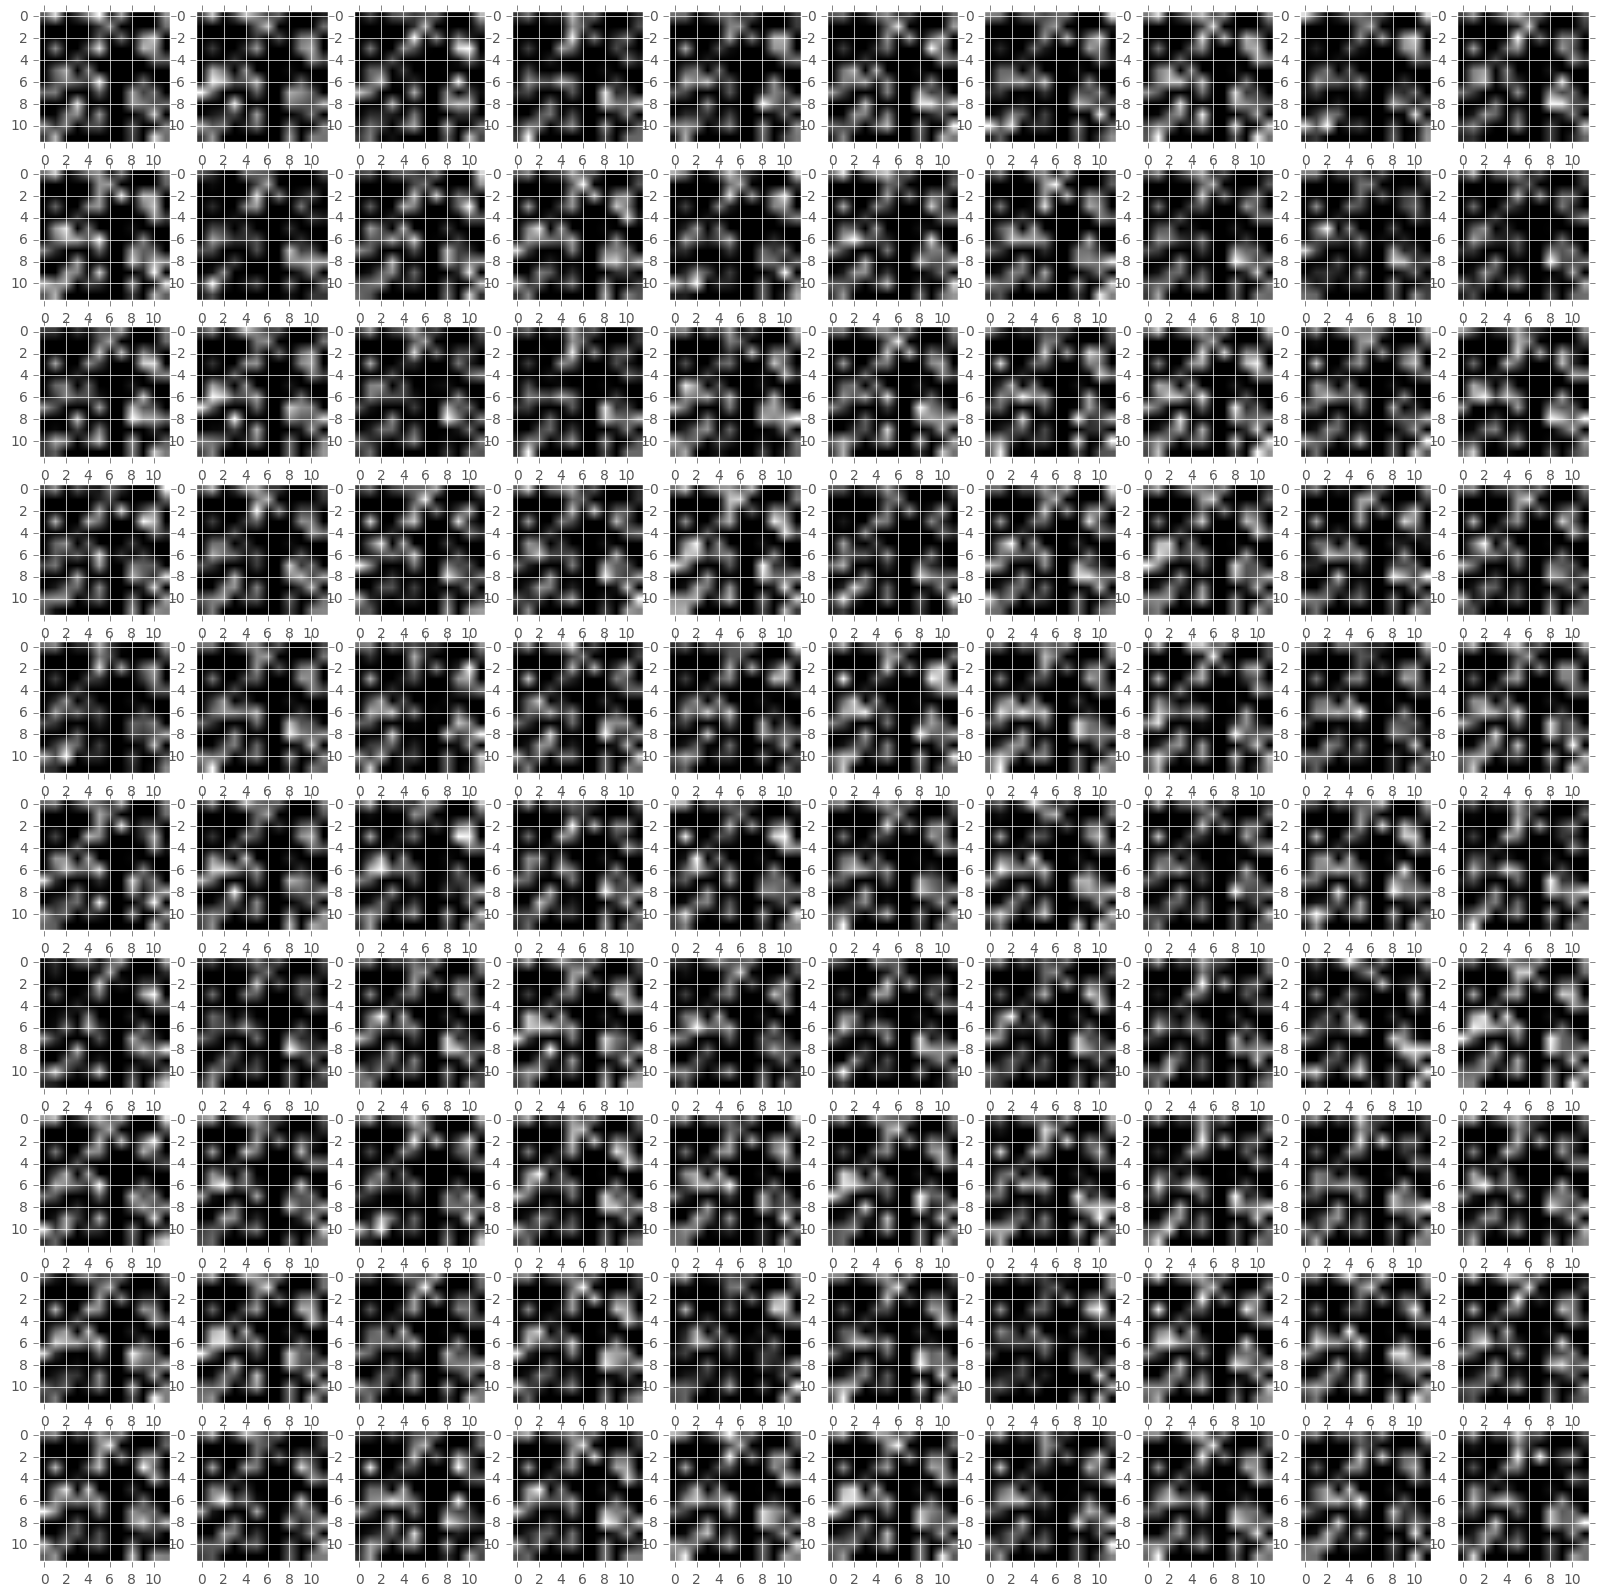

In [37]:
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

hidden_outputs = get_layer_output([X_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20,20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

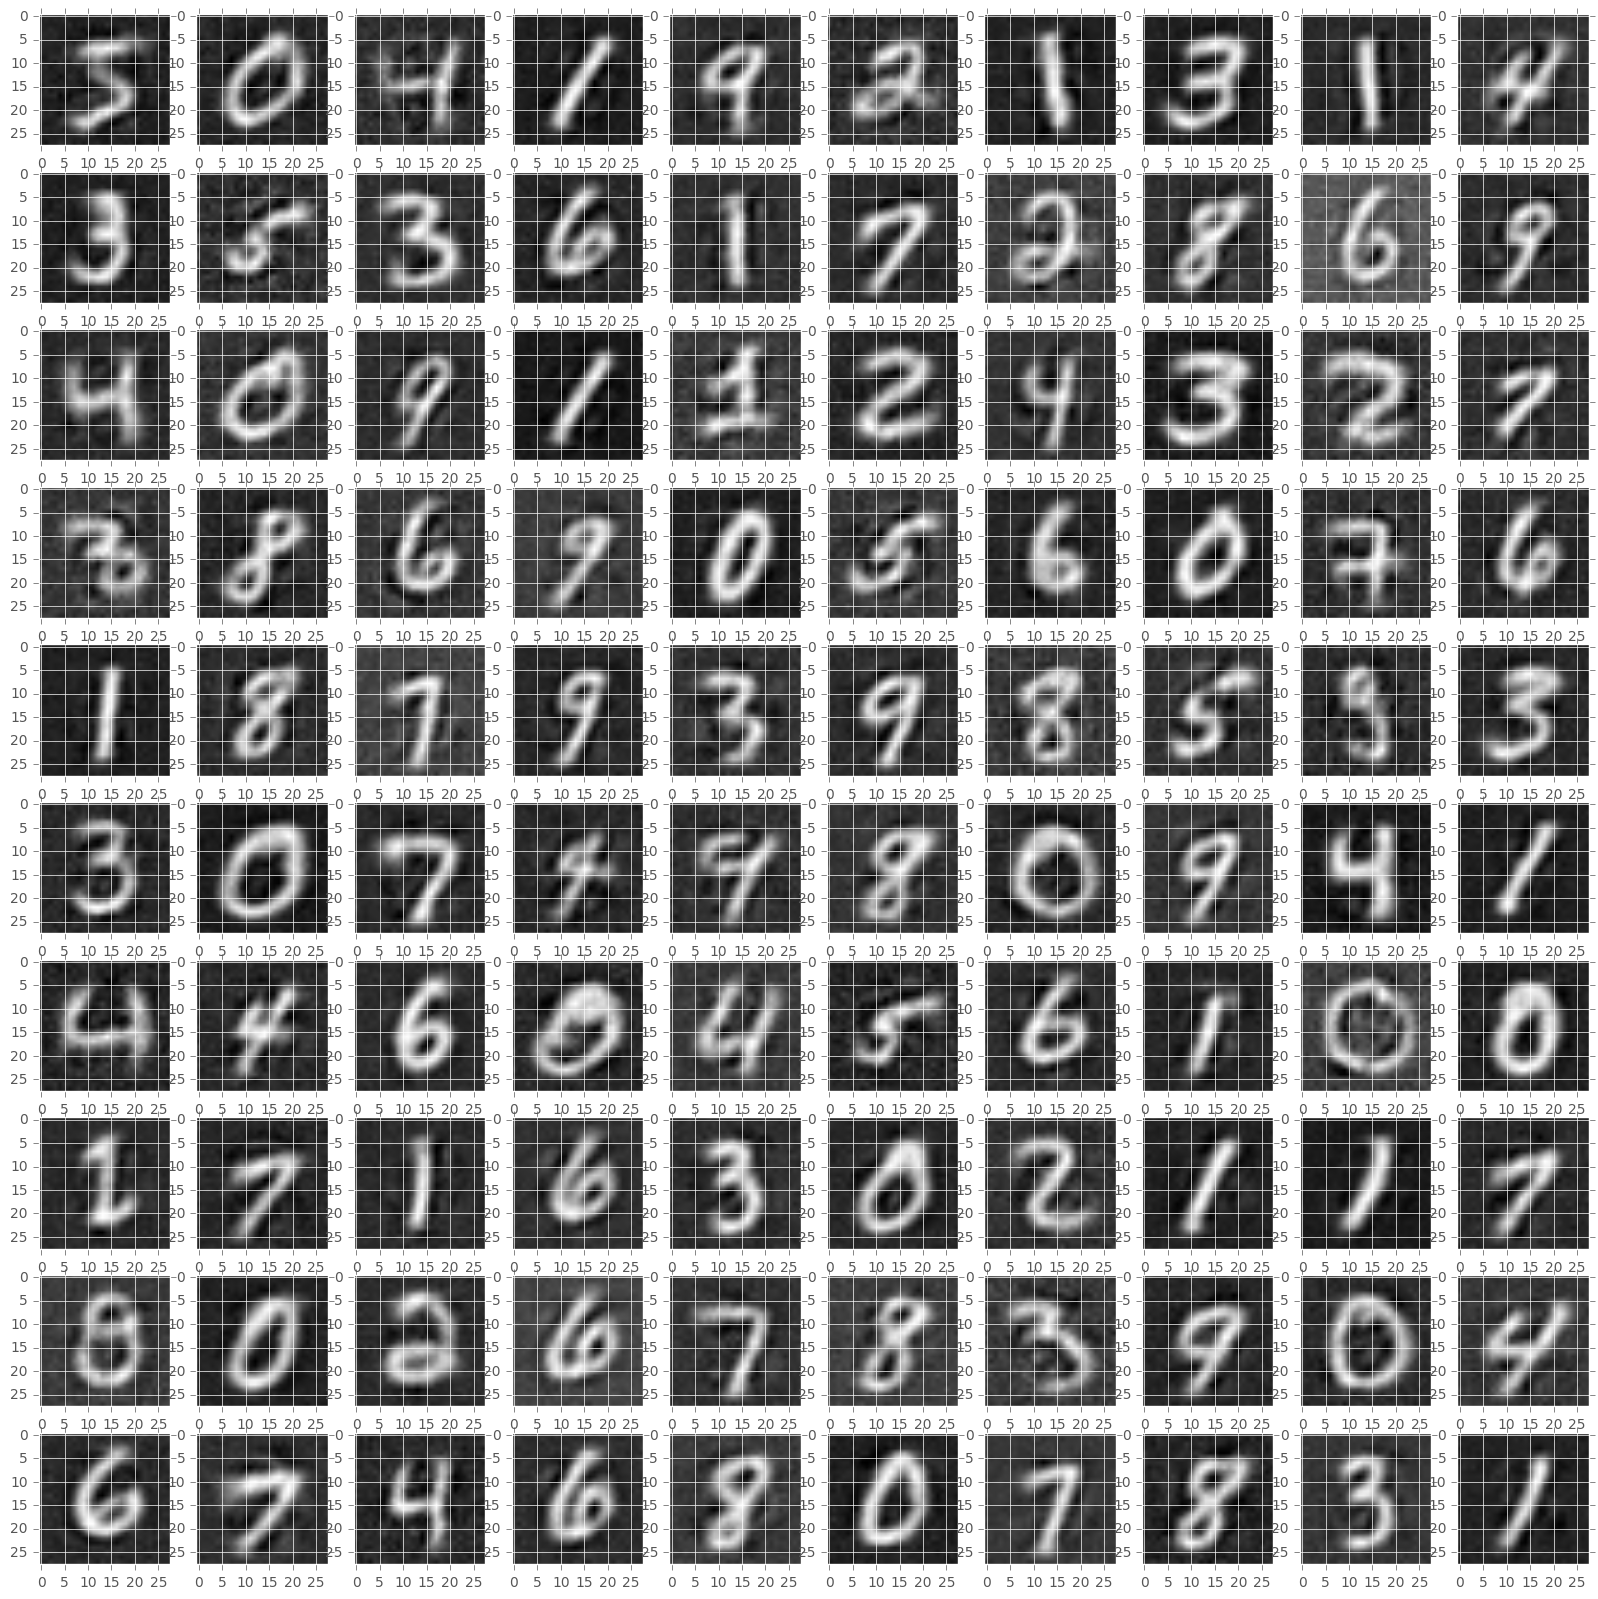

In [38]:

get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])

last_outputs = get_layer_output([X_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(20,20))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()